# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [57]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [58]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


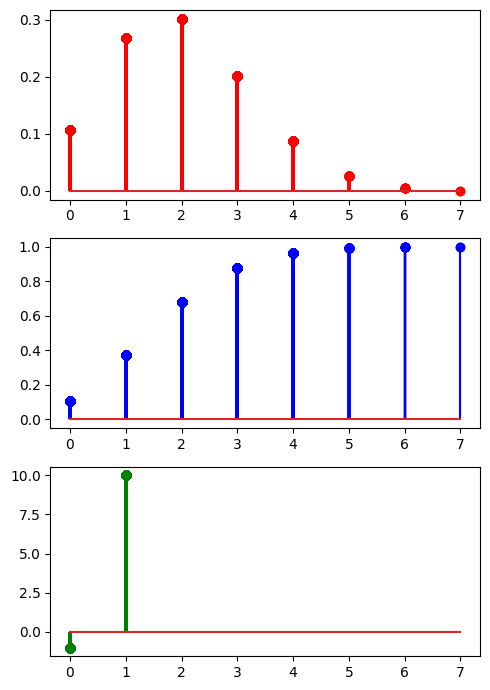

In [59]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

## Distribución Normal: 

In [60]:
# Se importa la librería: 
from scipy.stats import norm


# # # FUNCIONES NECESARIAS # # #

# Función Random Variates - RVS (Generación de los valores de la distribución):
def generate_norm (mean, std, size): 
    distribution = norm.rvs (loc = mean, scale = std, size = size);
    return distribution;

# Función Probability Density Function - PDF:
def pdf_norm (value, mean, std):
    density_norm = norm.pdf(x = value, loc = mean, scale = std);
    return density_norm;

# Función Cumulative Density Funtion - CDF: 
def cdf_norm (value, mean, std):
    cumulative_norm = norm.cdf(x = value, loc = mean, scale = std);
    return cumulative_norm;

# Función Percent Point Function - PPF: 
def ppf_norm (value, mean, std):
    point_norm = norm.ppf(q = value, loc = mean, scale = std);
    return point_norm;


In [61]:
# # # DEFINICIÓN DE DATOS  # # #

# Media: 
mean = 0;

# Desviación Estándar:
std = 1;

# Número de elementos en la distribución:
size = 2000;

In [62]:
# # # EXERCISE APPLICATION # # #

print(f"Probability that a Normal(0, 1) takes the value 2: {np.round(pdf_norm(2, mean, std), 4) * 100} %");
print(f"Probability that a Normal(0, 1) will take a value less than 2: {np.round(cdf_norm(2, mean, std), 4) * 100} %");
print(f"Which value of a Normal(0, 1) has a cumulative probability of 0.9? {np.round(ppf_norm(0.9, mean, std), 3)}");
print(f"Generate 2000 random values from a Normal(0, 1) distribution: {generate_norm(mean, std, size)}")

Probability that a Normal(0, 1) takes the value 2: 5.4 %
Probability that a Normal(0, 1) will take a value less than 2: 97.72 %
Which value of a Normal(0, 1) has a cumulative probability of 0.9? 1.282
Generate 2000 random values from a Normal(0, 1) distribution: [-0.87798259 -0.82688035 -0.22647889 ... -0.03582558 -0.53145455
 -1.56785943]


- En primer lugar, la probabilidad de que una **distribución normal definida**, N, tome el valor 2 **[P(N=2)]** es **muy baja** dado que tiene de media 0 y desviación típica 1, es decir, en promedio lo que los valores se mueven de la media es una unidad. Esto implica que el hecho de que haya valores que se desvíen 2 unidades de la media es muy poco probable.

- Por otro lado, de forma inversa, el hecho de que la **distribución normal** definida, N tome valores menores que 2 **[P(N<2)]** es **muy alta**, por el mismo motivo. Los valores se desvían, en promedio, una unidad de la media, por lo que es menos probable tener valores tan altos.

- Se ha observado también que, dada la naturaleza de la distribución normal con media 0 y desviación estándar 1, el **90% de los valores se encuentran por debajo del obtenido 1.282...**

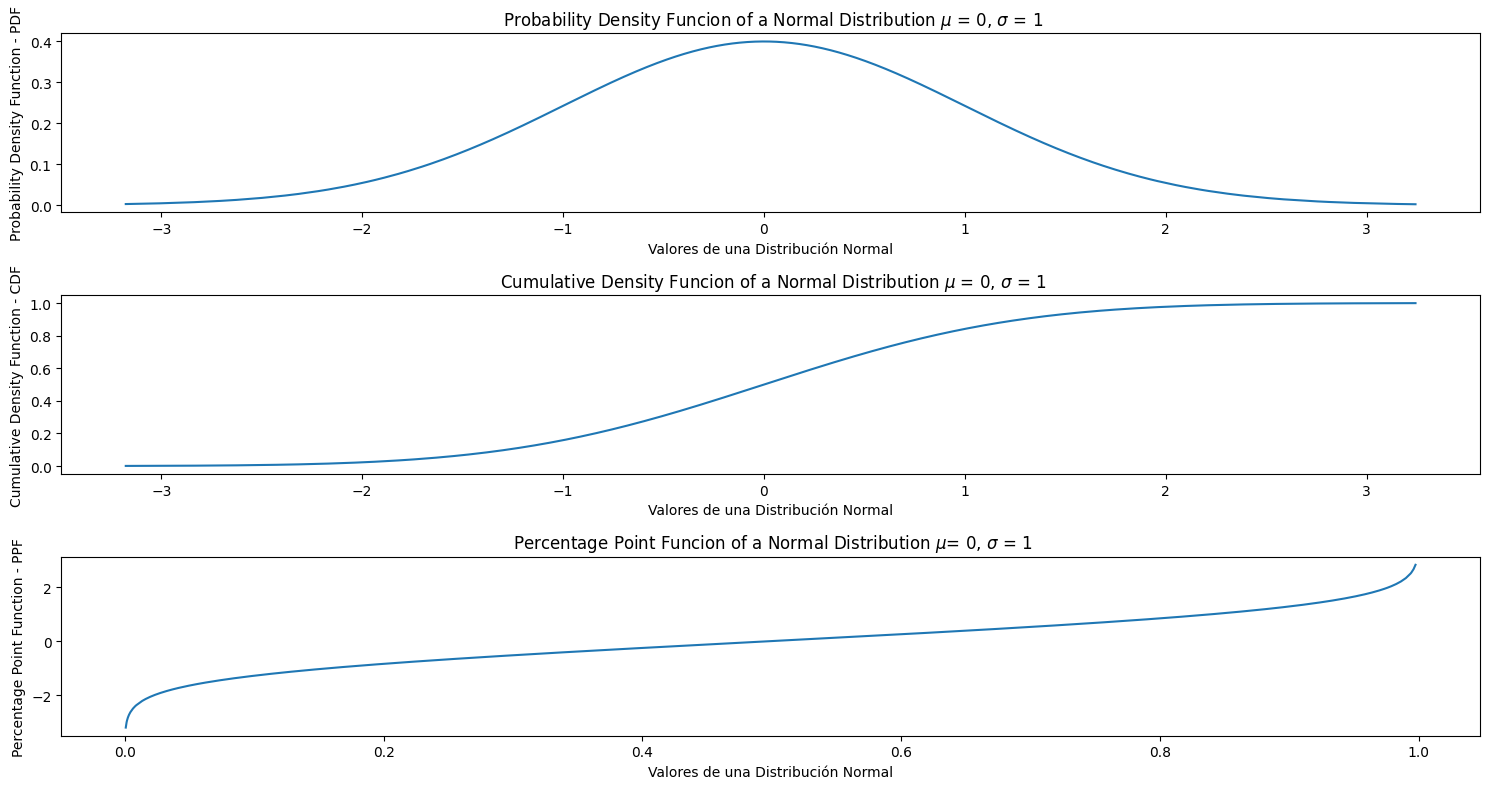

In [63]:
# # # PLOTS # # #

# Primero se debe generar una distribución normal para la cual poder calcular los parámetros: 
norm_distribution = np.sort(generate_norm (mean, std, size)); # Se ordenan los valores para poder plotear los parámetros con claridad

# Se guardan los arrays de cada uno de los parámetros para la distribución obtenida:
pdf_norm_distribution = pdf_norm(norm_distribution, mean, std);
cdf_norm_distribution = cdf_norm(norm_distribution, mean, std);
ppf_norm_distribution = ppf_norm(norm_distribution, mean, std);

plt.figure(figsize = (15, 8));

# Función Probability Density Function - PDF:
plt.subplot (3, 1, 1);
plt.plot (norm_distribution, pdf_norm_distribution);
plt.xlabel('Valores de una Distribución Normal');
plt.ylabel('Probability Density Function - PDF');
plt.title (f' Probability Density Funcion of a Normal Distribution $\mu$ = {mean}, $\sigma$ = {std}');

# Función Cumulative Density Funtion - CDF: 
plt.subplot (3, 1, 2);
plt.plot (norm_distribution, cdf_norm_distribution);
plt.xlabel('Valores de una Distribución Normal');
plt.ylabel('Cumulative Density Function - CDF');
plt.title (f' Cumulative Density Funcion of a Normal Distribution $\mu$ = {mean}, $\sigma$ = {std}');

# Función Percent Point Function - PPF:
plt.subplot (3, 1, 3);
plt.plot (norm_distribution, ppf_norm_distribution);
plt.xlabel('Valores de una Distribución Normal');
plt.ylabel('Percentage Point Function - PPF');
plt.title (f' Percentage Point Funcion of a Normal Distribution $\mu$= {mean}, $\sigma$ = {std}');

# Se ajusta la Figura al Espacio:
plt.tight_layout();

# Se muestran las figuras:
plt.show();

##  Distribución Uniforme:

In [64]:
# Se importa la librería: 
from scipy.stats import uniform


# # # FUNCIONES NECESARIAS # # #

# Función Random Variates - RVS (Generación de los valores de la distribución):
def generate_uniform (lower, width, size): 
    distribution = uniform.rvs (loc = lower, scale = width, size = size);
    return distribution;

# Función Probability Density Function - PDF:
def pdf_uniform (value, lower, width):
    density_uni = uniform.pdf(x = value, loc = lower, scale = width);
    return density_uni;

# Función Cumulative Density Funtion - CDF: 
def cdf_uniform (value, lower, width):
    cumulative_uni = uniform.cdf(x = value, loc = lower, scale = width);
    return cumulative_uni;

# Función Percent Point Function - PPF: 
def ppf_uniform (value, lower, width):
    point_uni = uniform.ppf(q = value, loc = lower, scale = width);
    return point_uni;

In [65]:
# # # DEFINICIÓN DE DATOS  # # #

# Valor Inferior: 
lower = 0;

# Valor Superior:
higher = 1;

# Ancho:
width = higher-lower;

# Número de elementos en la distribución:
size = 2000;

In [66]:
# # # EXERCISE APPLICATION # # #

print(f"Probability that a Uniform(0, 1) takes the value 2: {pdf_uniform(2, lower, width)}");
print(f"Probability that a Uniform(0, 1) will take a value less than 2: {cdf_uniform(2, lower, width)}");
print(f"Which value of a Uniform(0, 1) has a cumulative probability of 0.9? {ppf_uniform(0.9, lower, width)}");
print(f"Generate 2000 random values from a Uniform(0, 1) distribution: {generate_uniform(lower, width, size)}")

Probability that a Uniform(0, 1) takes the value 2: 0.0
Probability that a Uniform(0, 1) will take a value less than 2: 1.0
Which value of a Uniform(0, 1) has a cumulative probability of 0.9? 0.9
Generate 2000 random values from a Uniform(0, 1) distribution: [0.9326481  0.38305881 0.72952142 ... 0.31629235 0.97607059 0.25683157]


- En primer lugar, la **distribución uniforme** definida, U, es **completamente imposible** que tome el valor 2 **[P(U=2)]** dado que solo toma valores entre su límite inferior y superior [0 - 1].

- Del mismo modo, la **distribución uniforme** definida U, **seguro** que toma valores por debajo de 2 **P[U<2]** dado que solo toma valores entre sus límites [0 - 1].

- Se ha observado también que, dada la naturaleza de la distribución uniforme entre 0 y 1, el **90% de los valores se encuentran por debajo de 0.9**

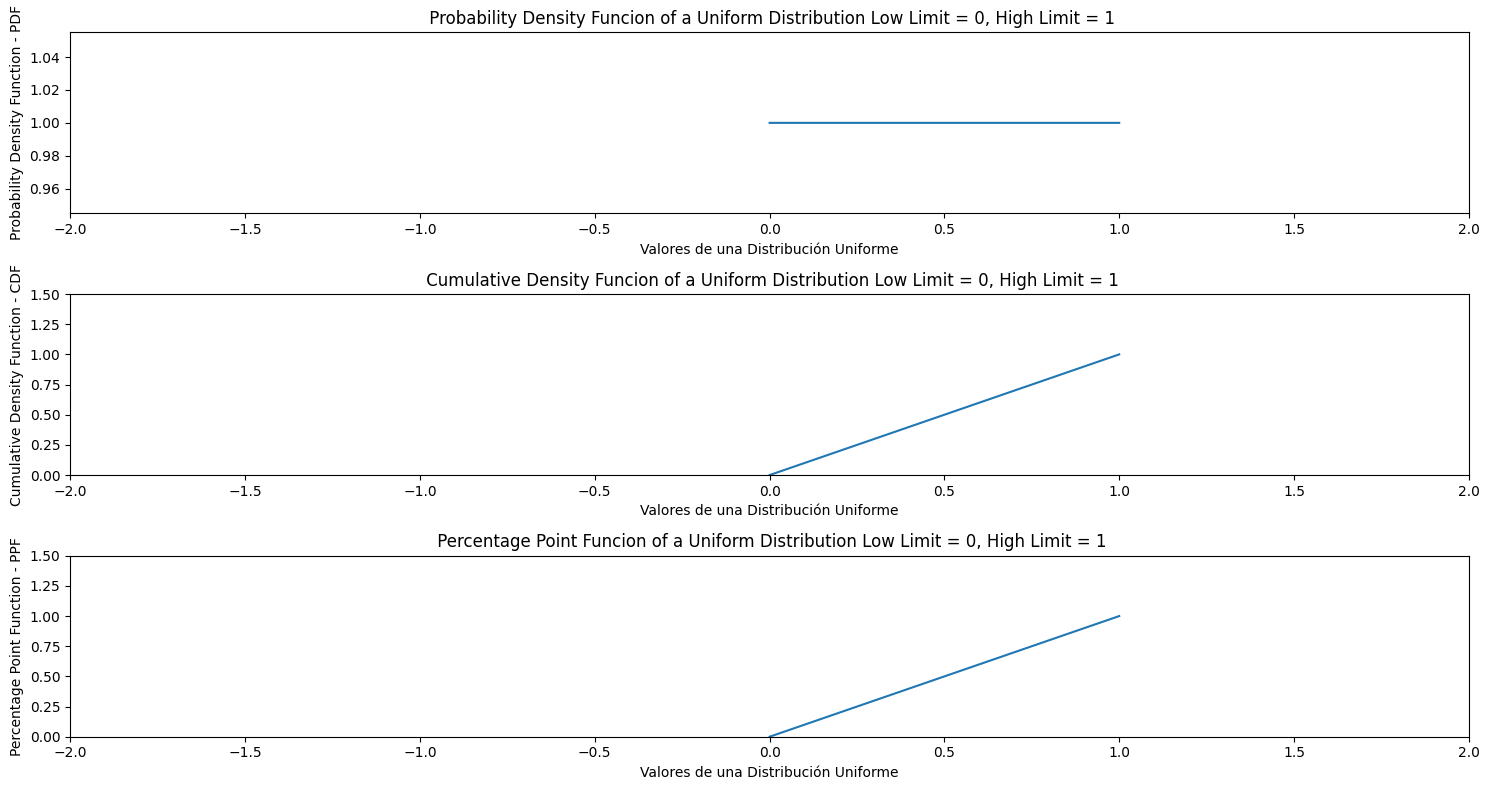

In [67]:
# # # PLOTS # # #

# Primero se debe generar una distribución normal para la cual poder calcular los parámetros: 
uni_distribution = np.sort(generate_uniform (lower, width, size));
#uni_distribution = np.arange(-5, 5, 0.01);

# Se guardan los arrays de cada uno de los parámetros para la distribución obtenida:
pdf_uni_distribution = pdf_uniform(uni_distribution, lower, width);
cdf_uni_distribution = cdf_uniform(uni_distribution, lower, width);
ppf_uni_distribution = ppf_uniform(uni_distribution, lower, width);

plt.figure(figsize = (15, 8));

# Función Probability Density Function - PDF:
plt.subplot (3, 1, 1);
plt.plot (uni_distribution, pdf_uni_distribution);
plt.xlabel('Valores de una Distribución Uniforme');
plt.xlim(left = -2, right = 2);
plt.ylabel('Probability Density Function - PDF');
plt.title (f' Probability Density Funcion of a Uniform Distribution Low Limit = {lower}, High Limit = {higher}');

# Función Cumulative Density Funtion - CDF: 
plt.subplot (3, 1, 2);
plt.plot (uni_distribution, cdf_uni_distribution);
plt.xlabel('Valores de una Distribución Uniforme');
plt.xlim(left = -2, right = 2);
plt.ylabel('Cumulative Density Function - CDF');
plt.ylim(bottom = 0, top = 1.5);
plt.title (f' Cumulative Density Funcion of a Uniform Distribution Low Limit = {lower}, High Limit = {higher}');

# Función Percent Point Function - PPF:
plt.subplot (3, 1, 3);
plt.plot (uni_distribution, ppf_uni_distribution);
plt.xlabel('Valores de una Distribución Uniforme');
plt.xlim(left = -2, right = 2);
plt.ylabel('Percentage Point Function - PPF');
plt.ylim(bottom = 0, top = 1.5);
plt.title (f' Percentage Point Funcion of a Uniform Distribution Low Limit = {lower}, High Limit = {higher}');

# Se ajusta la Figura al Espacio:
plt.tight_layout();

# Se muestran las figuras:
plt.show();